In [1]:
import numpy as np
from PySDM.physics.constants import si
from PySDM_examples.Luettmer_homogeneous_freezing.commons import run_simulations, hom_pure_droplet_freezing_backend, hom_pure_droplet_freezing_standard_setup
from PySDM_examples.Luettmer_homogeneous_freezing import plot
from importlib import reload
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot

In [117]:
# General settings
hom_freezing_types     = [  "KoopMurray2016" ]

number_of_nsd = (1e2, 1e3, 1e4)
vertical_updrafts = np.geomspace(0.2,10,num=9) * si.meter / si.second
number_concentrations = np.geomspace(100, 20000, num=10) / si.cm ** 3
sigmas = np.linspace( 1.5, 2., num=6)

backends = hom_pure_droplet_freezing_backend()
standard = hom_pure_droplet_freezing_standard_setup()
standard["type_droplet_distribution"] = "lognormal"
standard["sigma_droplet_distribution"] = 2.0
standard["r_ccn"] =  0.05e-6
standard["n_sd"] =  1e4

hom_freezing_labels  = [ r"KM16: $\sigma=$"+str(standard["sigma_droplet_distribution"]) ]

In [44]:
# High output step reference simulations
setting_dict = {
            **standard,
            "backend": backends["KoopMurray2016"],
            "hom_freezing": "KoopMurray2016",
            "w_updraft": 2.5,
            "n_output": 1,
            "silent": False,
            "deposition_enable": False,
            "n_sd": 1000,
            "sigma_droplet_distribution": 1.1,
            "r_ccn": 50.e-9,
            }
test = run_simulations(setting_dict)

Setting up simulation for KoopMurray2016 with wpdraft=2.5 and N_sd=1000 and n_ccn=749999999.9999999
Starting simulation...
all particles frozen or evaporated


In [26]:
# High output step reference simulations
setting_dict = {
            **standard,
            "backend": backends["KoopMurray2016"],
            "hom_freezing": "KoopMurray2016",
            "w_updraft": 2.5,
            "n_output": 1,
            "silent": False,
            "deposition_enable": False,
            "n_sd": 10000,
            "sigma_droplet_distribution": 2.0,
            "r_ccn": 50.e-9,
            }
reference_high_sig20_simulation = run_simulations(setting_dict)

Setting up simulation for KoopMurray2016 with wpdraft=2.5 and N_sd=10000 and n_ccn=749999999.9999999
Starting simulation...
all particles frozen or evaporated


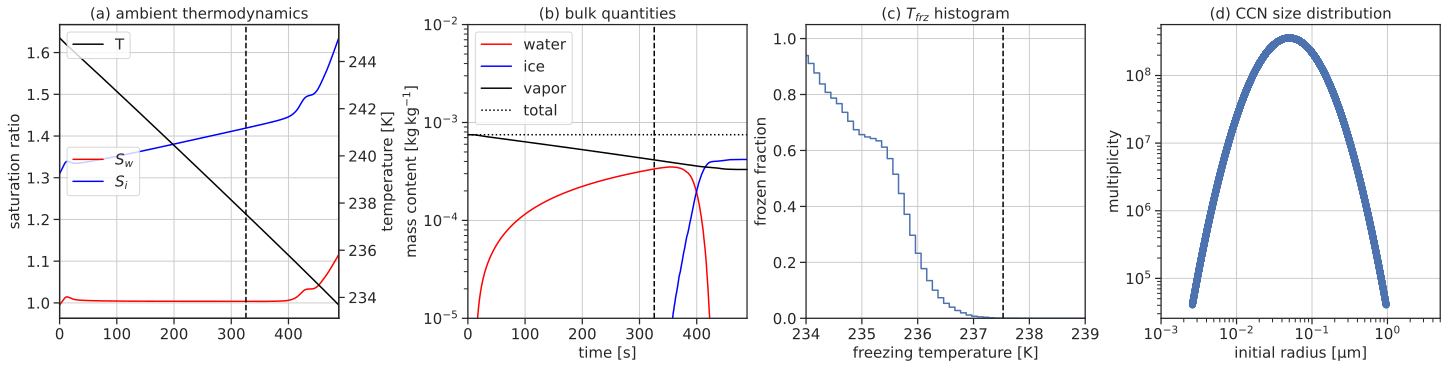

In [58]:
panel_labels = ["(a)", "(b)", "(c)", "(d)"]
frz_label = " "
panel_labels = [label + frz_label for label in panel_labels]
plot.plot_thermodynamics_and_bulk(reference_high_sig20_simulation, title_add=panel_labels, show_jhom=False, show_tf=True)
show_plot("fig_sup_2")

In [32]:
# Simulations for n_sd ensemble with deposition
nsd_ensemble_deposition = {}
nsd_ensemble_deposition["ens_variable"] = number_of_nsd
nsd_ensemble_deposition["ens_variable_name"] = "n_sd"
nsd_ensemble_deposition["hom_freezing_types"] = hom_freezing_types
nsd_ensemble_deposition["hom_freezing_labels"] = hom_freezing_labels

for hom_freezing_type in hom_freezing_types:
    nsd_ensemble_deposition[hom_freezing_type] = []
    for n_sd in number_of_nsd:
        setting_dict = {
            **standard,
            "n_sd": int(n_sd),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "number_of_ensemble_runs": 5,
            "deposition_enable": True,
            }
        nsd_ensemble_deposition[hom_freezing_type].append( run_simulations(setting_dict) )

In [33]:
#  Simulations for n_sd ensemble without deposition
nsd_ensemble_no_deposition = {}
nsd_ensemble_no_deposition["ens_variable"] = number_of_nsd
nsd_ensemble_no_deposition["ens_variable_name"] = "n_sd"
nsd_ensemble_no_deposition["hom_freezing_types"] = hom_freezing_types

for hom_freezing_type in hom_freezing_types:
    nsd_ensemble_no_deposition[hom_freezing_type] = []
    for n_sd in number_of_nsd:
        setting_dict = {
            **standard,
            "n_sd": int(n_sd),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "number_of_ensemble_runs": 5,
            "deposition_enable": False,
        }
        nsd_ensemble_no_deposition[hom_freezing_type].append(run_simulations(setting_dict))

In [34]:
# Updraft ensemble simulations without deposition
updraft_ensemble_no_deposition = {}
updraft_ensemble_no_deposition["ens_variable"] = vertical_updrafts
updraft_ensemble_no_deposition["ens_variable_name"] = "w_updraft"
updraft_ensemble_no_deposition["hom_freezing_types"] = hom_freezing_types

for hom_freezing_type in hom_freezing_types:
    updraft_ensemble_no_deposition[hom_freezing_type] = []
    for updraft in vertical_updrafts:
        setting_dict = {
            **standard,
            "w_updraft": updraft  * si.meter / si.second,
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "deposition_enable": False,
            }
        updraft_ensemble_no_deposition[hom_freezing_type].append( run_simulations(setting_dict) )

In [35]:
# Simulations for updraft histogram with deposition
updraft_ensemble_deposition = {}
updraft_ensemble_deposition["ens_variable"] = vertical_updrafts
updraft_ensemble_deposition["ens_variable_name"] = "w_updraft"
updraft_ensemble_deposition["hom_freezing_types"] = hom_freezing_types
updraft_ensemble_deposition["hom_freezing_labels"] = hom_freezing_labels

for hom_freezing_type in hom_freezing_types:
    updraft_ensemble_deposition[hom_freezing_type] = []
    for updraft in vertical_updrafts:
        setting_dict = {
            **standard,
            "w_updraft": updraft  * si.meter / si.second,
            "n_sd": int(1e4),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "number_of_ensemble_runs": 1,
            }

        updraft_ensemble_deposition[hom_freezing_type].append( run_simulations(setting_dict) )

In [36]:
# Simulations for CCN concentration histogram
ccn_ensemble_no_deposition = {}
ccn_ensemble_no_deposition["ens_variable"] = number_concentrations
ccn_ensemble_no_deposition["ens_variable_name"] = "n_ccn"
ccn_ensemble_no_deposition["hom_freezing_types"] = hom_freezing_types

for hom_freezing_type in hom_freezing_types:
    ccn_ensemble_no_deposition[hom_freezing_type] = []
    for n_ccn in number_concentrations:
        setting_dict = {
            **standard,
            "n_ccn": n_ccn,
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "deposition_enable": False,
        }
        ccn_ensemble_no_deposition[hom_freezing_type].append(run_simulations(setting_dict))

In [37]:
# Simulations for CCN concentration histogram
ccn_ensemble_deposition = {}
ccn_ensemble_deposition["ens_variable"] = number_concentrations
ccn_ensemble_deposition["ens_variable_name"] = "n_ccn"
ccn_ensemble_deposition["hom_freezing_types"] = hom_freezing_types
ccn_ensemble_deposition["hom_freezing_labels"] = hom_freezing_labels

for hom_freezing_type in hom_freezing_types:
    ccn_ensemble_deposition[hom_freezing_type] = []
    for n_dv in number_concentrations:
        setting_dict = {
            **standard,
            "n_sd": int(1e4),
            "n_ccn": n_dv,
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
        }
        ccn_ensemble_deposition[hom_freezing_type].append(run_simulations(setting_dict))

In [84]:
# Simulations for size distribution sigma histogram
sig_ensemble_deposition = {}
sig_ensemble_deposition["ens_variable"] = sigmas
sig_ensemble_deposition["ens_variable_name"] = "sig"
sig_ensemble_deposition["hom_freezing_types"] = hom_freezing_types
sig_ensemble_deposition["hom_freezing_labels"] = hom_freezing_labels

for hom_freezing_type in hom_freezing_types:
    sig_ensemble_deposition[hom_freezing_type] = []
    for sig in sigmas:
        setting_dict = {
            **standard,
            "n_sd": int(1e4),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "sigma_droplet_distribution": sig,
        }
        sig_ensemble_deposition[hom_freezing_type].append(run_simulations(setting_dict))



In [85]:
# Simulations for size distribution sigma histogram
sig_ensemble_no_deposition = {}
sig_ensemble_no_deposition["ens_variable"] = sigmas
sig_ensemble_no_deposition["ens_variable_name"] = "sig"
sig_ensemble_no_deposition["hom_freezing_types"] = hom_freezing_types
sig_ensemble_no_deposition["hom_freezing_labels"] = hom_freezing_labels

for hom_freezing_type in hom_freezing_types:
    sig_ensemble_no_deposition[hom_freezing_type] = []
    for sig in sigmas:
        setting_dict = {
            **standard,
            "n_sd": int(1e4),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "sigma_droplet_distribution": sig,
            "deposition_enable": False,
        }
        sig_ensemble_no_deposition[hom_freezing_type].append(run_simulations(setting_dict))

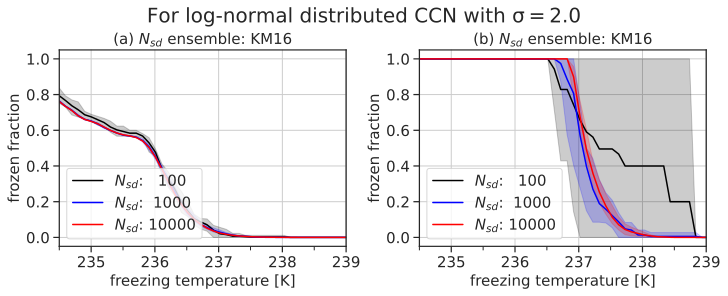

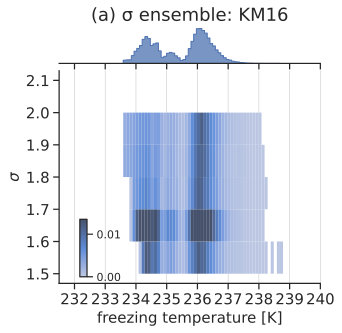

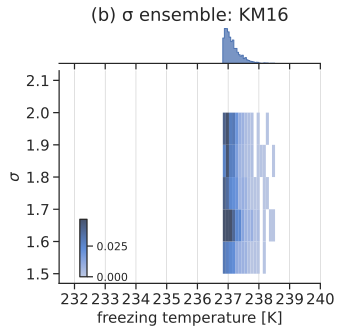

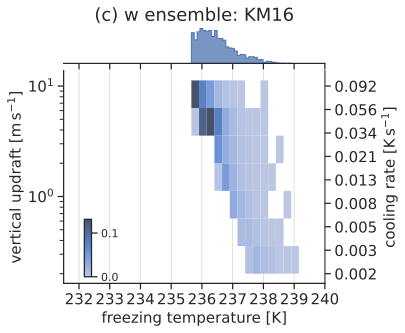

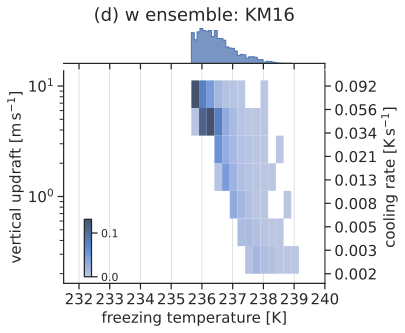

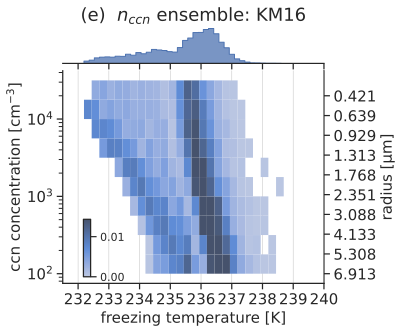

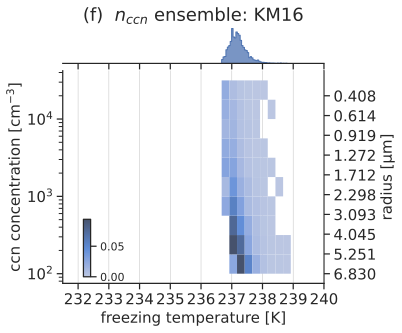

In [89]:
# Plot Figure 6 and Sup 3
fig_name = "fig_sup_3"
fig, axs = pyplot.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
fig.suptitle(r"For log-normal distributed CCN with $\mathrm{\sigma}=$"+str(standard["sigma_droplet_distribution"]),fontsize=20)

axs = axs.ravel()
axs[0] = plot.plot_freezing_temperatures_histogram_allinone(axs[0], nsd_ensemble_no_deposition["KoopMurray2016"], title = r"(a) $N_{sd}$ ensemble: KM16", lloc="lower left")
axs[1] = plot.plot_freezing_temperatures_histogram_allinone(axs[1], nsd_ensemble_deposition["KoopMurray2016"], title = r"(b) $N_{sd}$ ensemble: KM16", lloc="lower left")
show_plot(fig_name)

reload(plot)
fig_name = "fig6_"

plot.plot_freezing_temperatures_2d_histogram_seaborn(sig_ensemble_no_deposition, "KoopMurray2016", title = r"(a) $\mathrm{\sigma}$ ensemble: KM16")
show_plot(fig_name+"a")

plot.plot_freezing_temperatures_2d_histogram_seaborn(sig_ensemble_deposition, "KoopMurray2016", title = r"(b) $\mathrm{\sigma}$ ensemble: KM16")
show_plot(fig_name+"b")

plot.plot_freezing_temperatures_2d_histogram_seaborn(updraft_ensemble_deposition, "KoopMurray2016", title = "(c) w ensemble: KM16")
show_plot(fig_name+"c")

plot.plot_freezing_temperatures_2d_histogram_seaborn(updraft_ensemble_deposition, "KoopMurray2016", title = "(d) w ensemble: KM16")
show_plot(fig_name+"d")

plot.plot_freezing_temperatures_2d_histogram_seaborn(ccn_ensemble_no_deposition, "KoopMurray2016", title = r"(e)  $n_{ccn}$ ensemble: KM16")
show_plot(fig_name+"e")

plot.plot_freezing_temperatures_2d_histogram_seaborn(ccn_ensemble_deposition, "KoopMurray2016", title = r"(f)  $n_{ccn}$ ensemble: KM16")
show_plot(fig_name+"f")

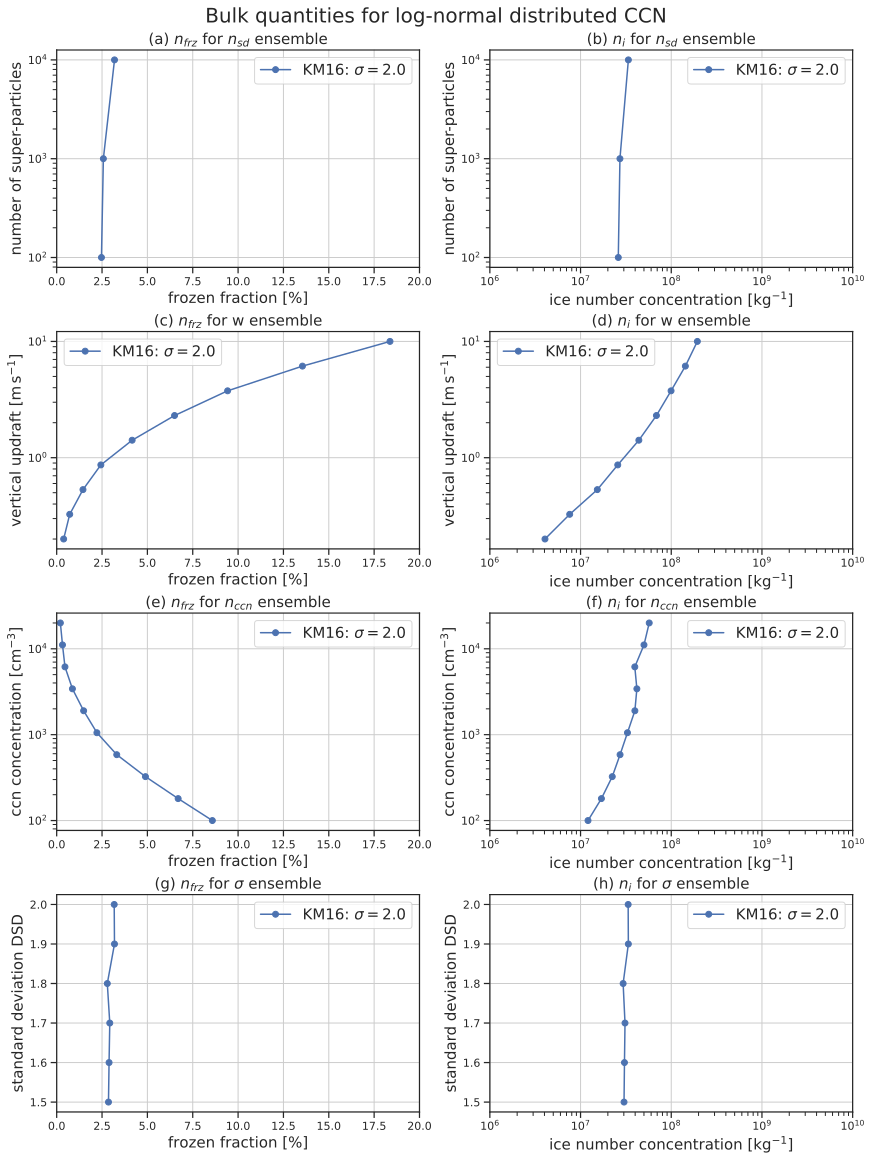

In [119]:
# Plot figure 7
reload(plot)
fig_name = "fig7"
fig, axs = pyplot.subplots(4, 2, figsize=(12, 16), constrained_layout=True)
fig.suptitle("Bulk quantities for log-normal distributed CCN",fontsize=20)

axs = axs.ravel()
plot_ensembles = [ nsd_ensemble_deposition, updraft_ensemble_deposition, ccn_ensemble_deposition, sig_ensemble_deposition ]
panel_labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)"]

i = 0
for ens in plot_ensembles:
    axs[i] = plot.plot_ensemble_bulk(axs[i],[ens,], "freezing_fraction", title_add=panel_labels[i])
    i += 1
    axs[i] = plot.plot_ensemble_bulk(axs[i],[ens,], "ni", title_add=panel_labels[i])
    i += 1

show_plot(fig_name)